<a href="https://colab.research.google.com/github/cjffcnx/Ai-Lab1-SrijanGajurel/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering Algorithm
This notebook demonstrates the implementation of the K-Means clustering algorithm from scratch in Python. It clusters a set of 2D data points into `k` groups based on Euclidean distance.

Author: Srijan Gajurel  
Date: [2025/03/07]

In [4]:
import matplotlib.pyplot as plt
import random
import math


In [5]:
# Sample 2D data points
data = [
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [8.0, 8.0],
    [1.0, 0.6],
    [9.0, 11.0],
    [8.0, 2.0],
    [10.0, 2.0],
    [9.0, 3.0]
]


In [6]:
# Euclidean distance between two points
def distance(p1, p2):
    return math.sqrt(sum((x - y)**2 for x, y in zip(p1, p2)))

# Assign points to the nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        dists = [distance(point, centroid) for centroid in centroids]
        cluster_index = dists.index(min(dists))
        clusters[cluster_index].append(point)
    return clusters

# Calculate mean of points in each cluster to find new centroids
def compute_centroids(clusters):
    centroids = []
    for cluster in clusters:
        if cluster:
            centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            centroid = [0, 0]
        centroids.append(centroid)
    return centroids


In [7]:
# Plot clusters and centroids
def plot_clusters(clusters, centroids, iteration):
    colors = ['r', 'g', 'b', 'c', 'm']
    plt.figure(figsize=(8, 6))
    for i, cluster in enumerate(clusters):
        if cluster:
            xs, ys = zip(*cluster)
            plt.scatter(xs, ys, c=colors[i], label=f'Cluster {i+1}')
    for i, centroid in enumerate(centroids):
        plt.scatter(*centroid, c='k', marker='X', s=200, edgecolors='white', label=f'Centroid {i+1}')
    plt.title(f'K-Means Clustering - Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:
# Main K-Means function
def k_means(data, k=2, max_iters=10):
    # Randomly choose initial centroids from data
    centroids = random.sample(data, k)

    for i in range(max_iters):
        clusters = assign_clusters(data, centroids)
        plot_clusters(clusters, centroids, iteration=i+1)
        new_centroids = compute_centroids(clusters)
        if new_centroids == centroids:
            break  # convergence
        centroids = new_centroids

    return centroids, clusters


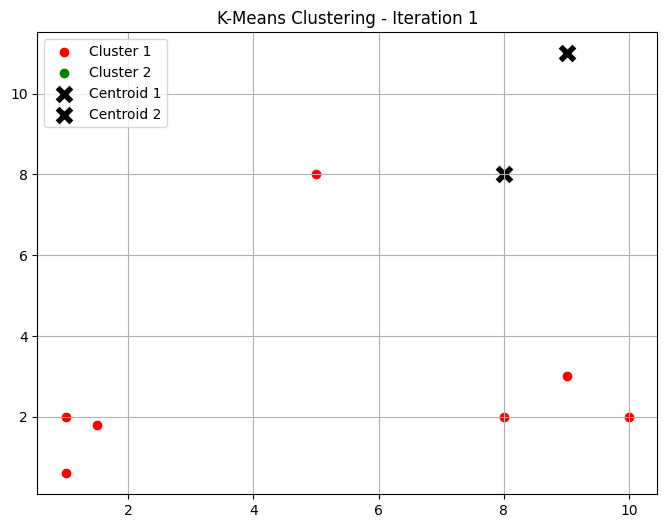

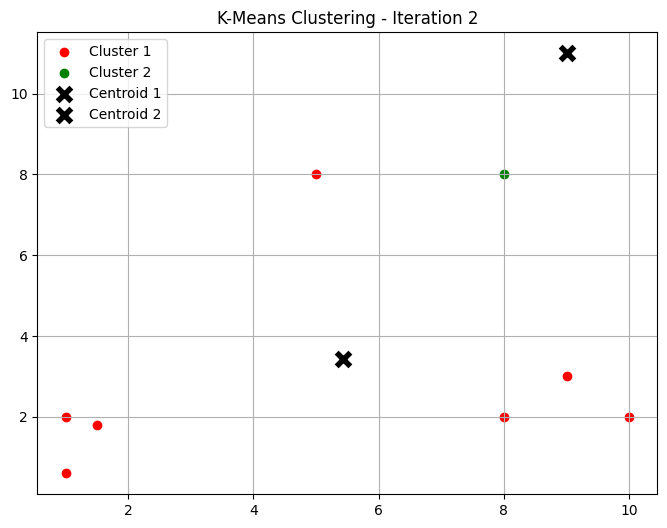

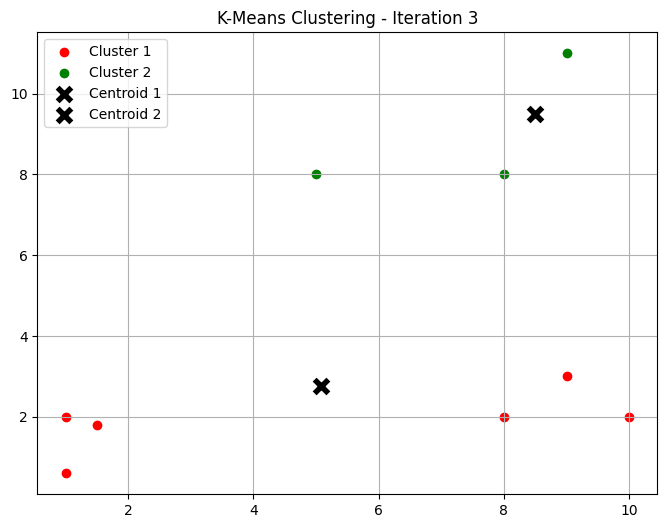

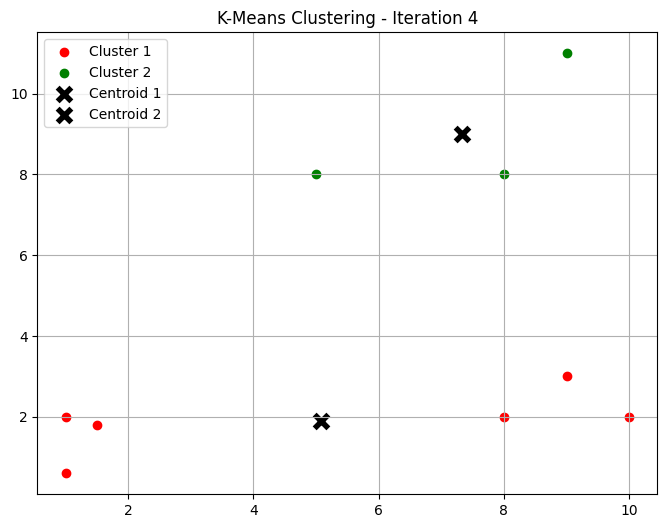

In [9]:
# Run with k=2
final_centroids, final_clusters = k_means(data, k=2)
